# Stochastic Logistic Growth model

This example shows how the stochastic logistic growth model can be used.
This model describes the growth of a population of individuals, where the birth rate per capita, initially $b_0$, decreases to 0 as the population size, $\mathcal{C}(t)$, approaches a carrying capacity, $k$.

The population grows starting from an initial population size, $n_0$, to a carrying capacity $k$ following a rate according to the following model [(Simpson et al., 2019)](https://doi.org/10.1101/533182):
   $$A \xrightarrow{b_0(1-\frac{\mathcal{C}(t)}{k})} 2A$$

The model is simulated according to the Gillespie stochastic simulation algorithm [(Gillespie, 1976)](https://doi.org/10.1016/0021-9991(76)90041-3), [(Erban et al., 2007)](https://arxiv.org/abs/0704.1908):
   1. Sample a random value r from a uniform distribution: $r \sim \text{Uniform}(0,1)$
   2. Calculate the time ($\tau$) until the next single reaction as follows:
   $$ \tau = \frac{-\ln{r}}{\mathcal{C}(t)b_{0} (1-\frac{\mathcal{C}(t)}{k})} $$
   3. Update the population size at time t + $\tau$ as: $ \mathcal{C}(t + \tau) = \mathcal{C}(t) + 1 $
   4. Return to step (1) until population size reaches $k$
   

In [1]:
import pints
import pints.toy
import pints.toy.stochastic
import matplotlib.pyplot as plt
import numpy as np

Specify initial population size, time points at which to record population values, initial birth rate $b_0$, and carrying capacity, $k$

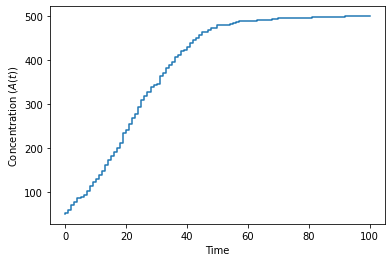

In [2]:
n_0 = 50
model = pints.toy.stochastic.LogisticModel(n_0)

times = np.linspace(0, 100, 101)

# $b_0$ = 0.1, $k$ = 500
params = [0.1, 500]

values = model.simulate(params, times)

plt.step(times, values)
plt.xlabel('Time')
plt.ylabel(r'Concentration ($A(t)$)')
plt.show()

Given the stochastic nature of this model, every iteration returns a different result. However, averaging the population values at each time step, produces a reproducible result which tends towards a deterministic function as the the number of iterations tends to infinity: $$ \mathcal{C}(t) = \frac{k\mathcal{C}(0)}{\mathcal{C}(0) + e^{-b_{0}t}(k-\mathcal{C}(0))} $$


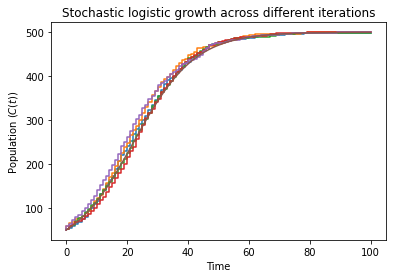

In [3]:
def simulate_n(n):
    values = np.zeros(len(times))
    for i in range(n):
        values += model.simulate(params,times).reshape(-1) / n
    plt.plot(times, values, label=r'$n=%s$' % n)
    
for i in range(5):
    values = model.simulate(params, times)
    plt.step(times, values)

simulate_n(1000)
plt.title('Stochastic logistic growth across different iterations')
plt.xlabel('Time')
plt.ylabel(r'Population ($C(t)$)')
plt.show()

By running the model 1000 times and averaging the results we can see that indeed we converge on the deterministic mean:

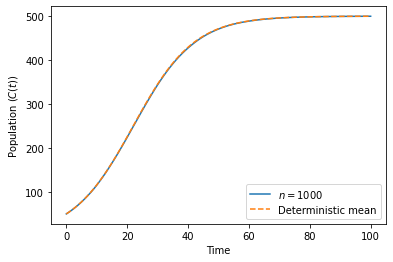

In [4]:
simulate_n(1000)
plt.plot(times, model.mean(params, times), '--', label="Deterministic mean")
plt.legend()
plt.xlabel('Time')
plt.ylabel(r'Population ($C(t)$)')
plt.show()